In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/yash/Downloads/train.csv",usecols = ["GarageQual","FireplaceQu","SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [4]:
df.mode()

,FireplaceQu,GarageQual,SalePrice
0,Gd,TA,140000


In [5]:
df["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [6]:
df["GarageQual"].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

Text(0, 0.5, 'Number of House')

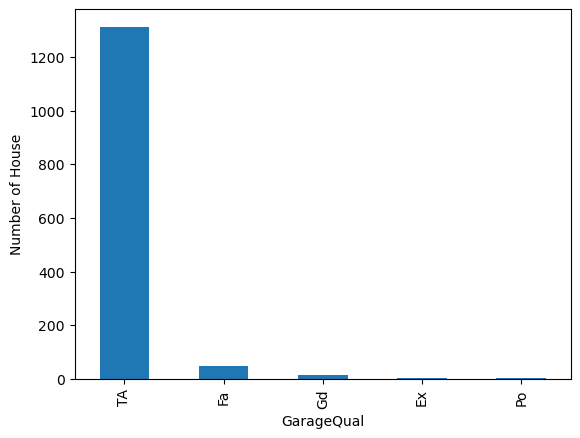

In [7]:
df["GarageQual"].value_counts().sort_values(ascending = False).plot(kind = "bar") 
# sort_values() is used to sort the values (smallest to largest or largest to smallest).
# ascending = True → sort smallest to largest
# ascending = False → sort largest to smallest
 
plt.xlabel("GarageQual")
plt.ylabel("Number of House")

In [8]:
df["GarageQual_TA"] = df["GarageQual"].fillna("TA")

Text(0.5, 1.0, 'GarageQual')

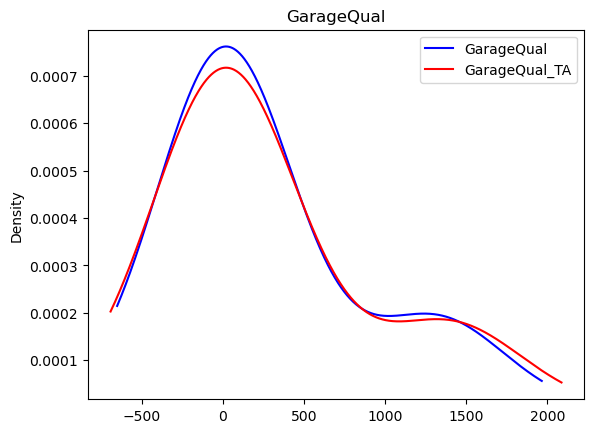

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df["GarageQual"].value_counts().plot(kind = "kde",color = "Blue",ax = ax)
df["GarageQual_TA"].value_counts().plot(kind = "kde",color = "Red",ax = ax)
labels = ["GarageQual","GarageQual_TA"]
ax.legend(labels,loc = "best")
plt.title("GarageQual")

<Axes: xlabel='FireplaceQu'>

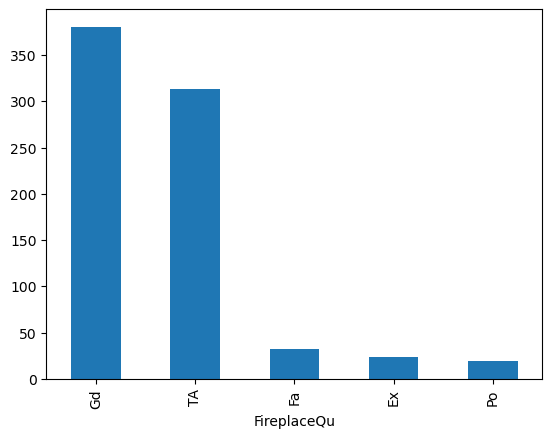

In [10]:
df["FireplaceQu"].value_counts().sort_values(ascending = False).plot(kind = "bar") 

In [11]:
# by using Slearn 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = ["SalePrice"]),df["SalePrice"])

In [12]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'most_frequent')

In [13]:
x_train = impute.fit_transform(x_train)
x_test = impute.transform(x_test)

In [14]:
# Use Missing Word

df["FireplaceQu"].fillna("Missing",inplace = True)

/tmp/ipykernel_32347/179139588.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FireplaceQu"].fillna("Missing",inplace = True)


<Axes: xlabel='FireplaceQu'>

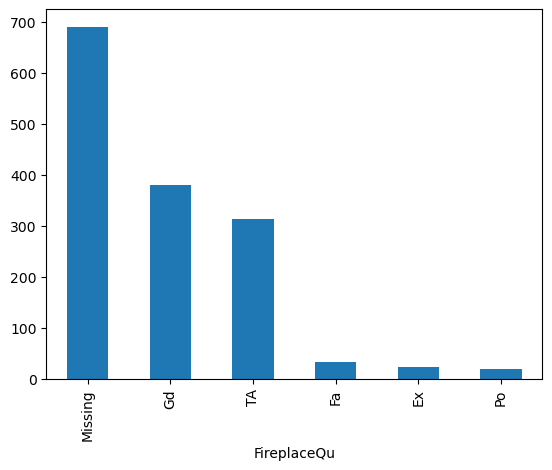

In [15]:
df["FireplaceQu"].value_counts().plot(kind = "bar")